## 02 - Exploratory Data Analysis (EDA)

En este notebook se realiza el Análisis Exploratorio de Datos (EDA) sobre el conjunto de datos previamente limpiado. El objetivo principal de esta fase es conocer en profundidad las características, relaciones y patrones existentes en los datos de los clientes, con el fin de extraer información relevante para orientar correctamente el análisis posterior de segmentación.

Durante este análisis se utilizarán estadísticas descriptivas, visualizaciones y análisis bivariados para:

- Comprender mejor el comportamiento de los clientes.
- Detectar posibles correlaciones entre variables.
- Observar la distribución de las variables clave para la segmentación.
- Evaluar la calidad de las variables seleccionadas para el modelo de clustering.

Esta fase es clave para tomar decisiones informadas sobre qué variables utilizar y cómo abordar el problema de segmentación de clientes en el siguiente paso del proyecto.

Empezamos importando las librerías necesarias y cargando los datos limpios:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

pd.set_option('display.max_columns', None)
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("../data/clean_dataset.csv")
df.sample(5)

Education Marital_Status   Income  Recency  Complain  Age  \
1466  Postgraduate      Partnered  79419.0       96         0   44   
2175      Graduate         Single  57731.0        0         0   45   
93        Graduate      Partnered  85693.0       59         0   35   
2098      Graduate      Partnered  50116.0       68         0   57   
1088      Graduate      Partnered  30023.0       28         0   42   

      Customer_Days  Total_Children  Family_Load  Total_Spent  Prop_Wines  \
1466              7               0            1         1631    0.460454   
2175            583               1            1          704    0.377841   
93              435               1            2         1169    0.330197   
2098              9               2            3           66    0.818182   
1088             97               1            2           61    0.180328   

      Prop_Fruits  Prop_Meat  Prop_Fish  Prop_Sweet  Prop_Gold  \
1466     0.077866   0.421214   0.012262    0.009197   0.019007   
2175     0.029830   0.426136   0.092330    0.011364   0.062500   
93       0.147134   0.156544   0.158255    0.112917   0.094953   
2098     0.000000   0.151515   0.000000    0.000000   0.030303   
1088     0.000000   0.262295   0.114754    0.098361   0.344262   

      Total_Purchases  Prop_Web_Purchases  Prop_Catalog_Purchases  \
1466               15            0.266667                0.400000   
2175               26            0.307692                0.307692   
93                 27            0.333333                0.185185   
2098                7            0.142857                0.000000   
1088                6            0.333333                0.000000   

      Prop_Store_Purchases  Price_Sensitivity  Monthly_Purchase_Frequency  \
1466              0.266667           0.066667                   15.000000   
2175              0.230769           0.153846                    1.337907   
93                0.407407           0.074074                    1.862069   
2098              0.571429           0.285714                    7.000000   
1088              0.500000           0.166667                    1.855670   

      Web_Conversion_Rate  Campaigns_Accepted  
1466             2.000000                   0  
2175             1.333333                   0  
93               1.800000                   0  
2098             0.200000                   1  
1088             0.250000                   0

Empecemos con el análisis univariado de las variables numéricas y después de las categóricas:

In [4]:
def plot_histograms(df, columns):
    ncols = 2
    nrows = int(np.ceil(len(columns) / 2))
    
    fig, ax = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))
    ax = ax.flatten()

    for i, col in enumerate(columns):
        sns.histplot(df[col], kde=True, bins=30, color="skyblue", ax=ax[i])
        ax[i].set_title(f'Histograma de {col}')

    # Eliminar ejes vacíos si hay menos de 4 columnas
    for j in range(len(columns), len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()

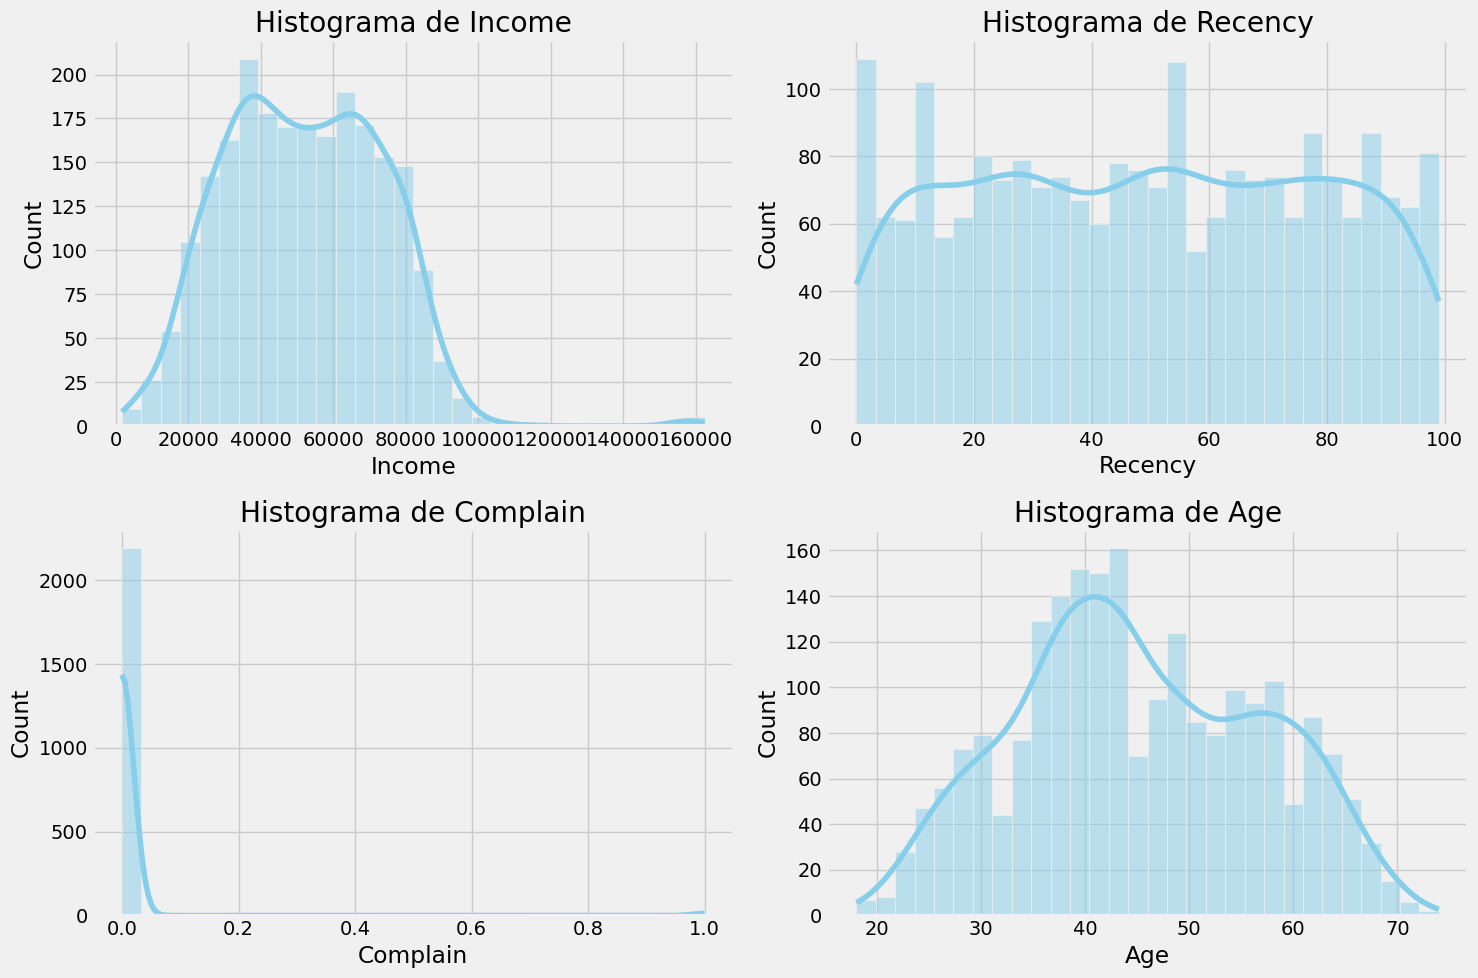

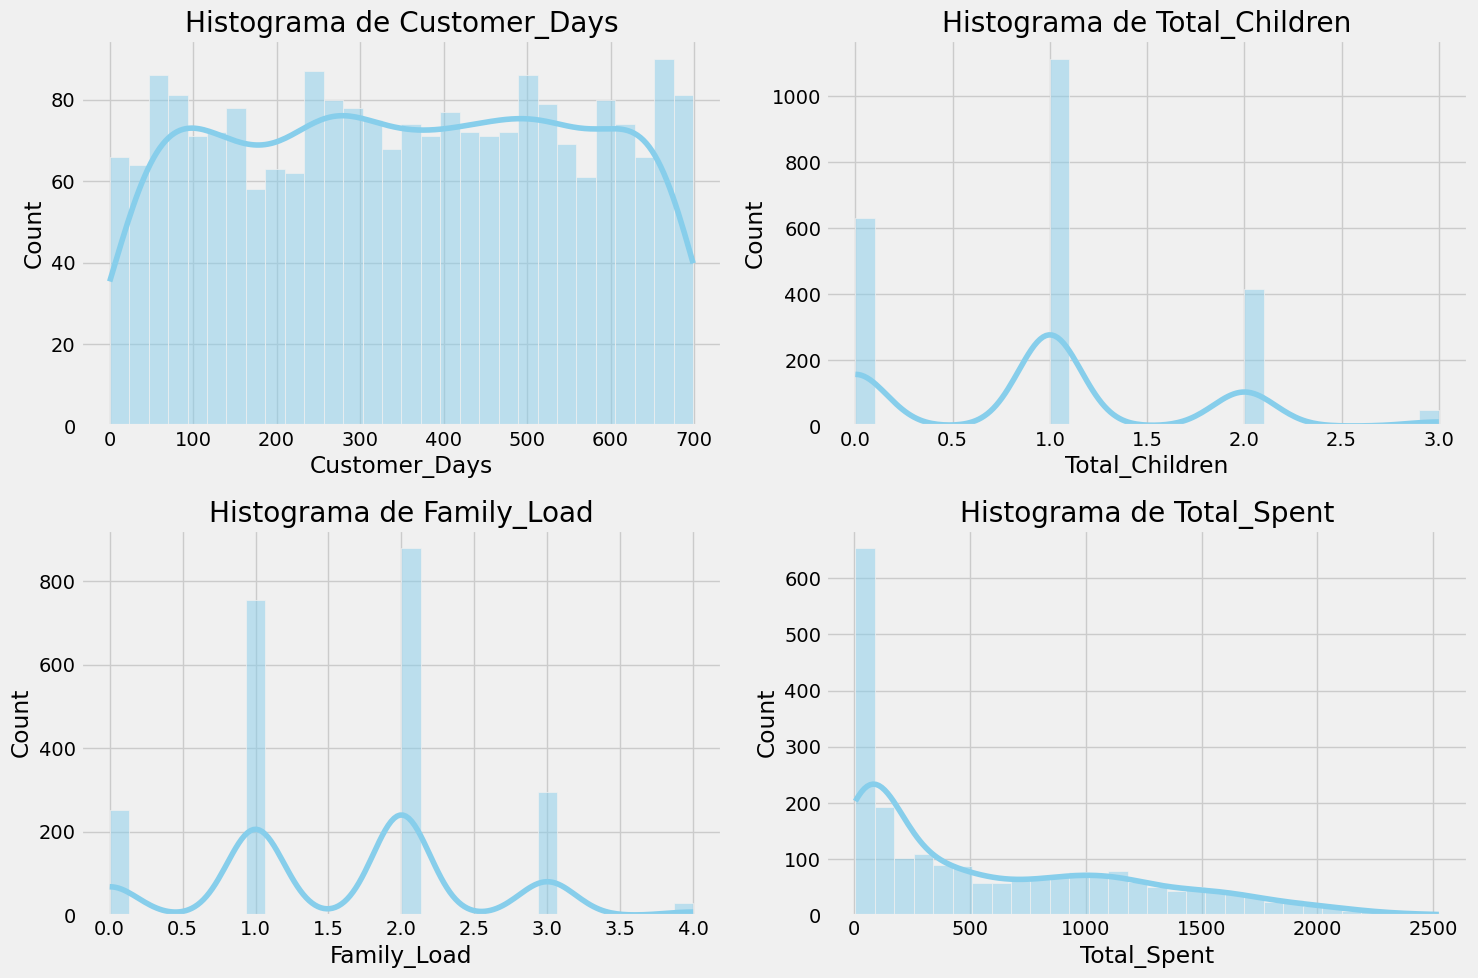

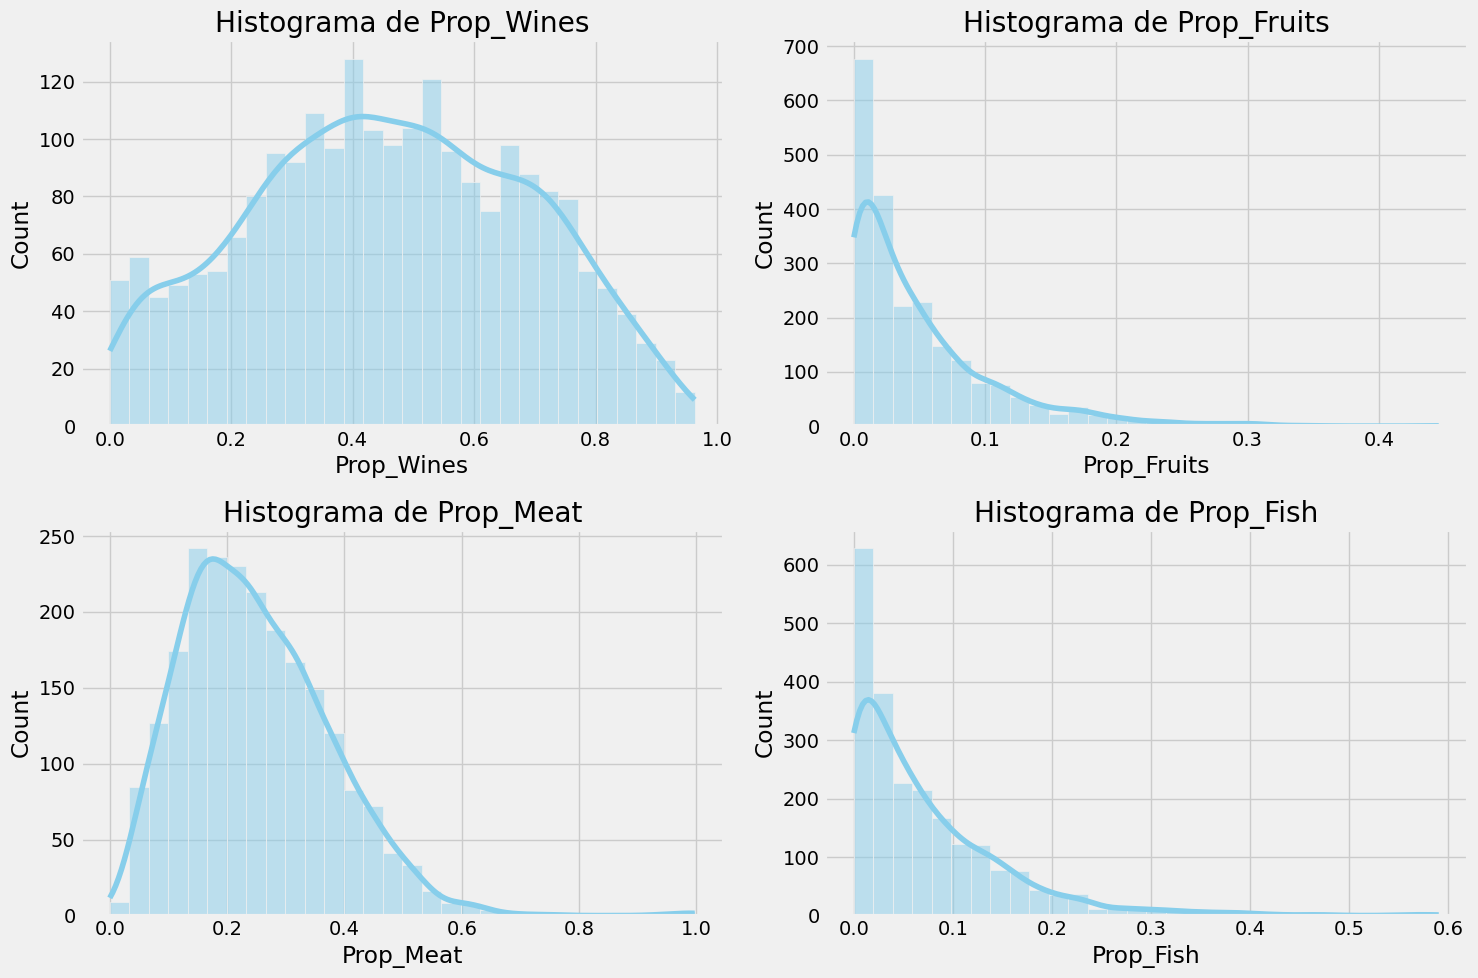

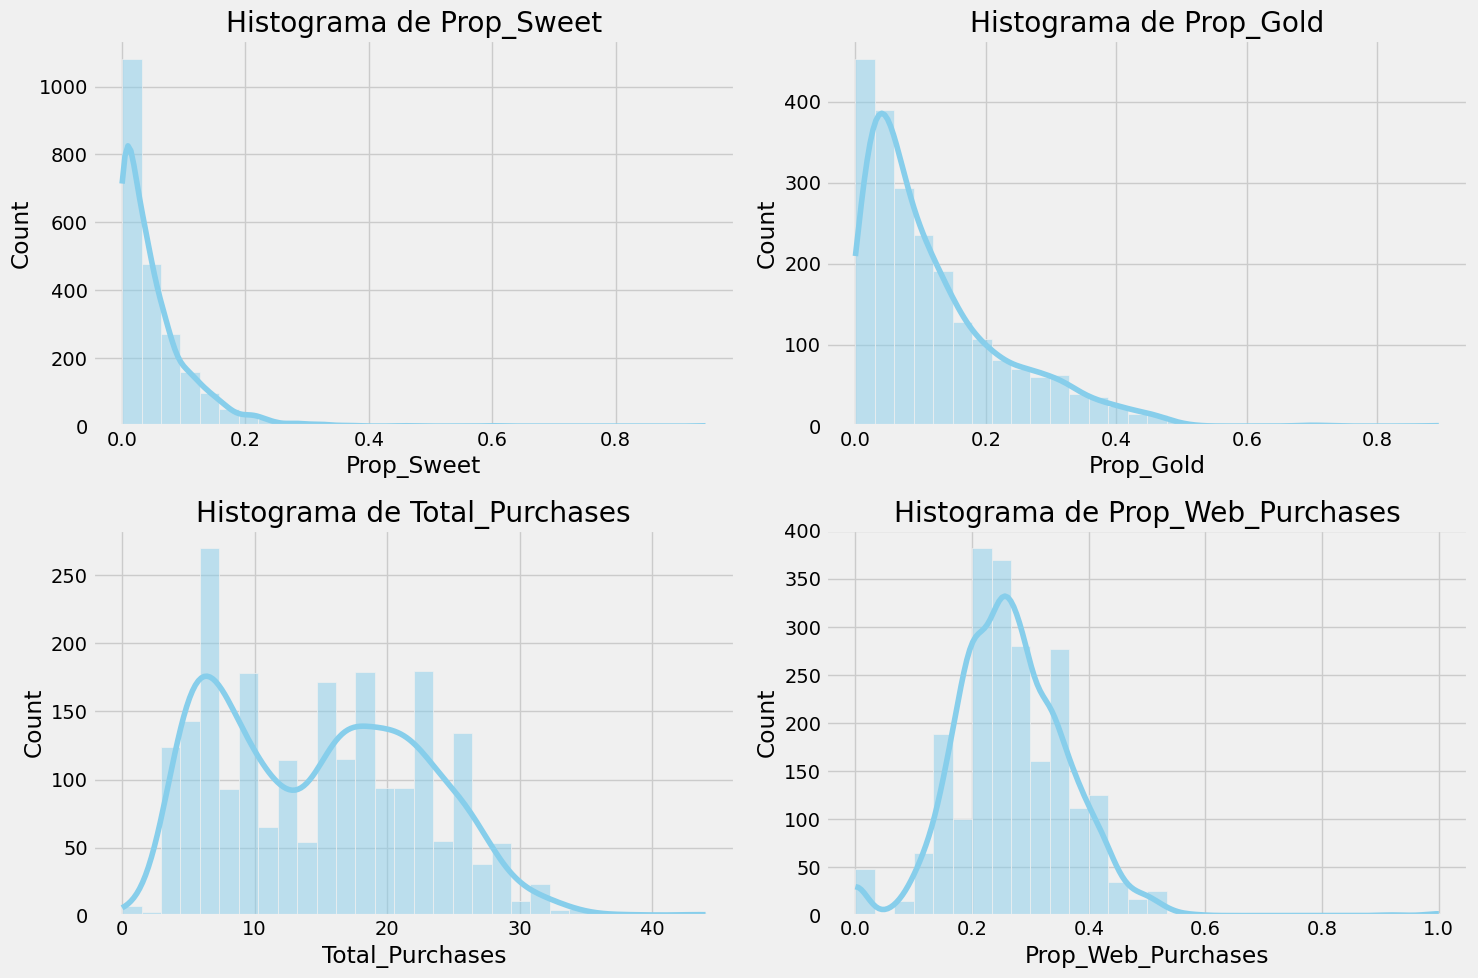

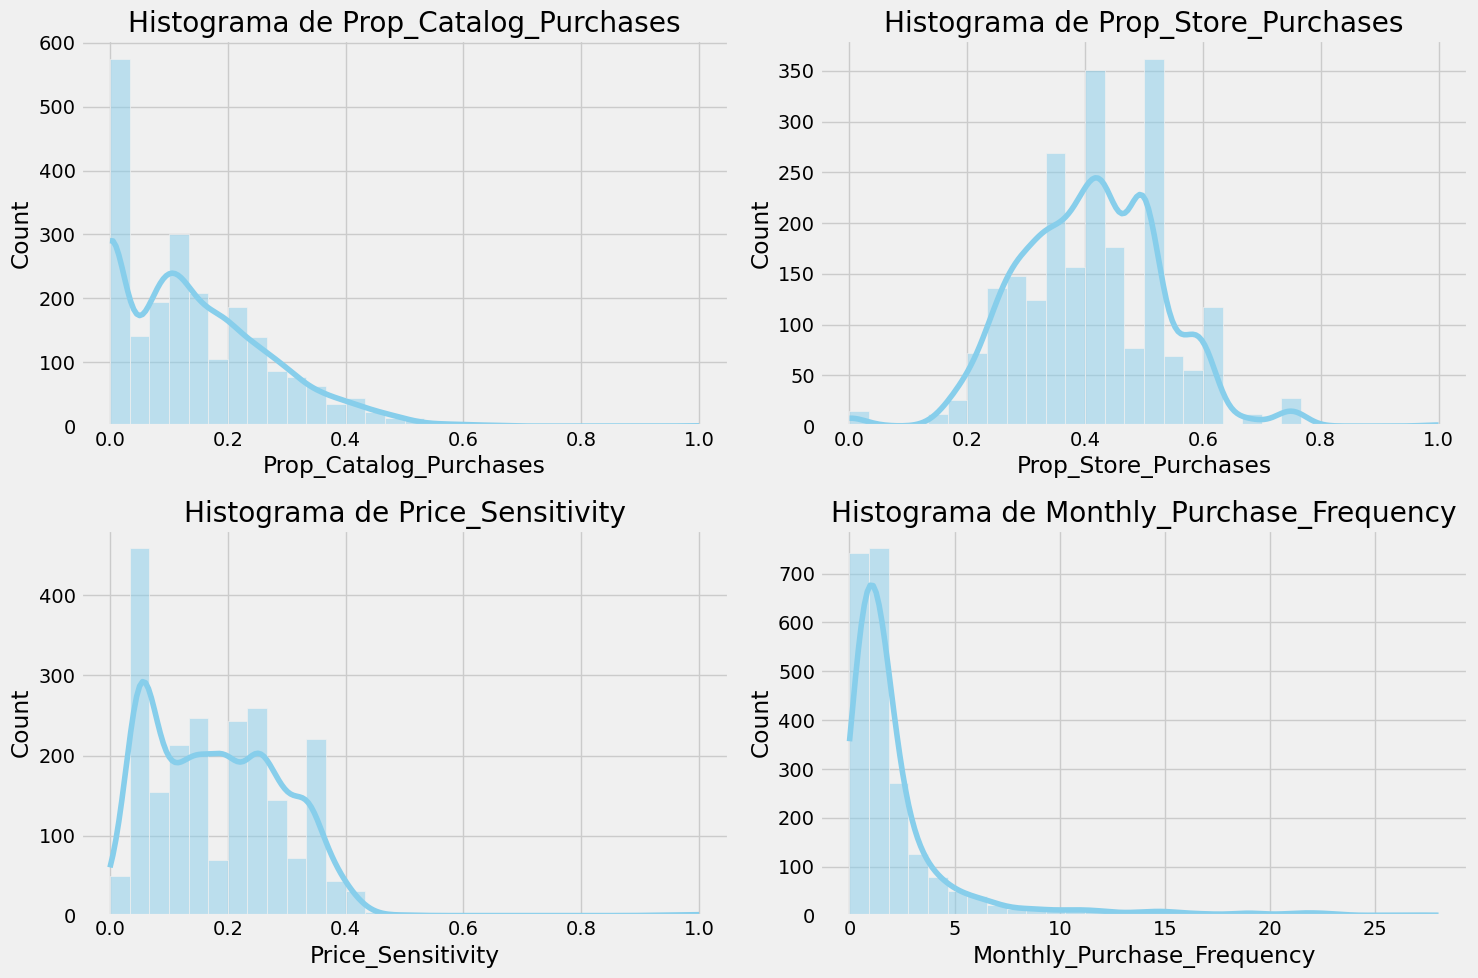

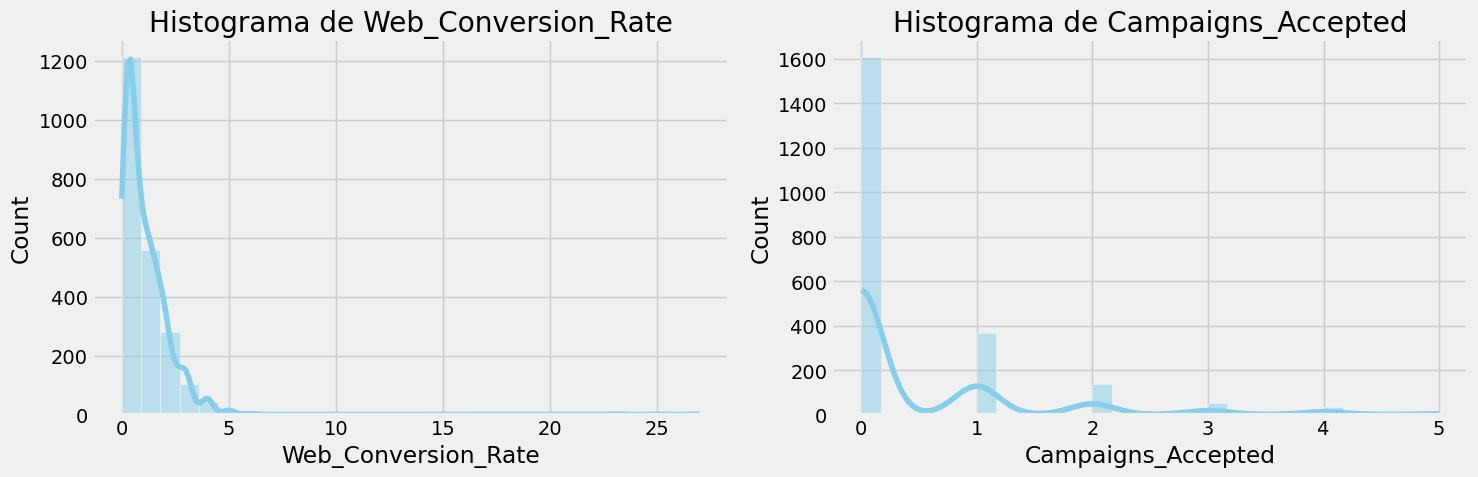

In [5]:
num_cols = df.select_dtypes(include="number").columns

# Dividir las columnas en bloques de 4 parq wue no se pase del límite
for i in range(0, len(num_cols), 4):
    plot_histograms(df, num_cols[i:i+4])


### Observaciones:

- **Income**: Sigue una distribución aproximadamente normal, aunque presenta una ligera asimetría positiva.
- **Complain**: Muy bajo número de clientes han puesto una queja (valor 1).
- **Age**: La mayoría de los datos se concentran alrededor de los 40 años, con una menor cantidad entre los 50 y 60 años.
- **Recency** y **Customer_Days**: Ambas variables parecen tener una distribución **uniforme** o **equitativa**, sin una concentración clara de valores.
- **Total_Children**: La mayoría de los clientes tienen 1 hijo, seguido por 0, 2 y muy pocos con 3.
- **Total_Spent**: Tiene un gran pico en 0, después los valores siguen una tendencia negativa.
- **Proporción de Vinos (Prop_Wines)**: Sigue una distribución **normal**, con una concentración de valores bajos.
- **Proporción de Frutas (Prop_Fruits)**: La mayoría de los valores se concentran entre el 0% y 5%, con una caída pronunciada entre el 30% y 40%.
- **Proporción de Carne (Prop_Meat)**: Tiene una distribución **normal**, con valores concentrados alrededor del 20% y una disminución gradual.
- **Proporción de Pescado (Prop_Fish)**: Picos en 0 y luego decrece.
- **Proporción de Dulces (Prop_Sweet)**: Similar a la de Pescado, con picos en 0 y una caída posterior.
- **Proporción de Oro (Prop_Gold)**: Similar a la de Pescado y Dulces, con una distribución de picos en 0 y decreciente.
- **Total_Purchases**: Tiene una distribución concentrada entre 5 y 25 compras.
- **Proporción de Compras Web (Prop_Web_Purchases)**: Distribución **normal**, pero concentrada en valores bajos.
- **Proporción de Compras por Catálogo (Prop_Catalog_Purchases)**: Picos en 0 y una caída progresiva.
- **Proporción de Compras en Tienda (Prop_Store_Purchases)**: Tiene una distribución **normal**.
- **Price Sensitivity**: Concentra la mayoría de los valores entre 0 y 40%, indicando una baja sensibilidad al precio en la mayoría de los clientes.
- **Monthly_Purchase_Frequency**: La mayoría de los clientes realizan entre 0 y 5 compras mensuales.
- **Web_Conversion_Rate**: Similar a la frecuencia de compra mensual, con una concentración en valores bajos.
- **Campaigns_Accepted**: Picos en 0 y luego una disminución progresiva en la aceptación de campañas.


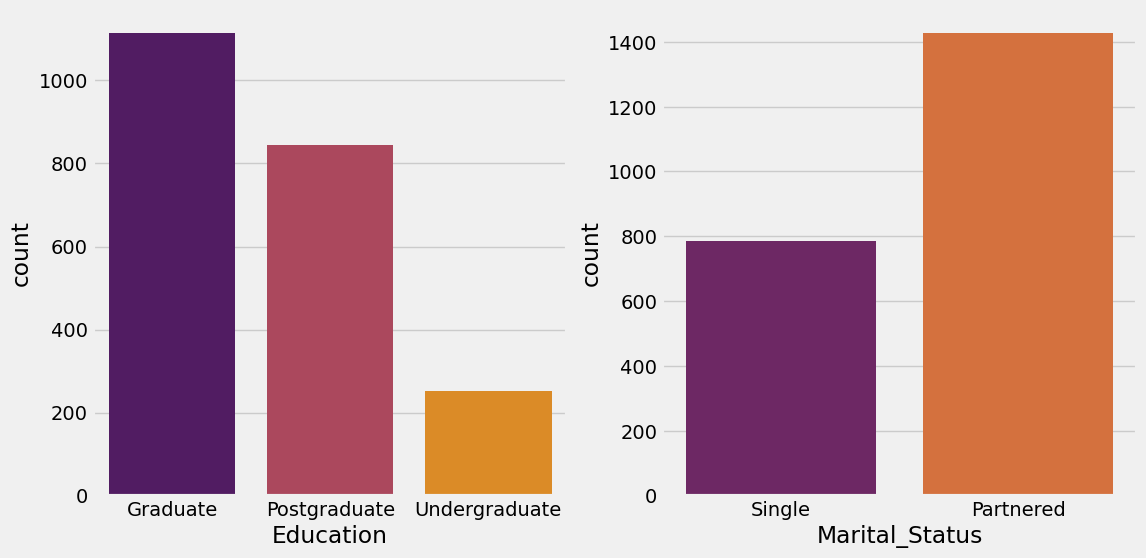

In [6]:
cat_cols = df.select_dtypes(include = "O").columns

fig, ax = plt.subplots(1, 2, figsize = (12 ,6))
ax = ax.flatten()


for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax = ax[i], hue = col, palette="inferno")

plt.show()

### Observaciones:

- La mayoría de los clientes son **graduados**, seguidos por los **posgraduados**. Los clientes **no graduados** representan un grupo significativamente menor.
- La mayoría de las personas tiene **pareja**, lo que podría influir en sus patrones de consumo o decisiones de compra.

Crearemos ahroa un mapa de calor de la correlación para ver relaciones entre variables:

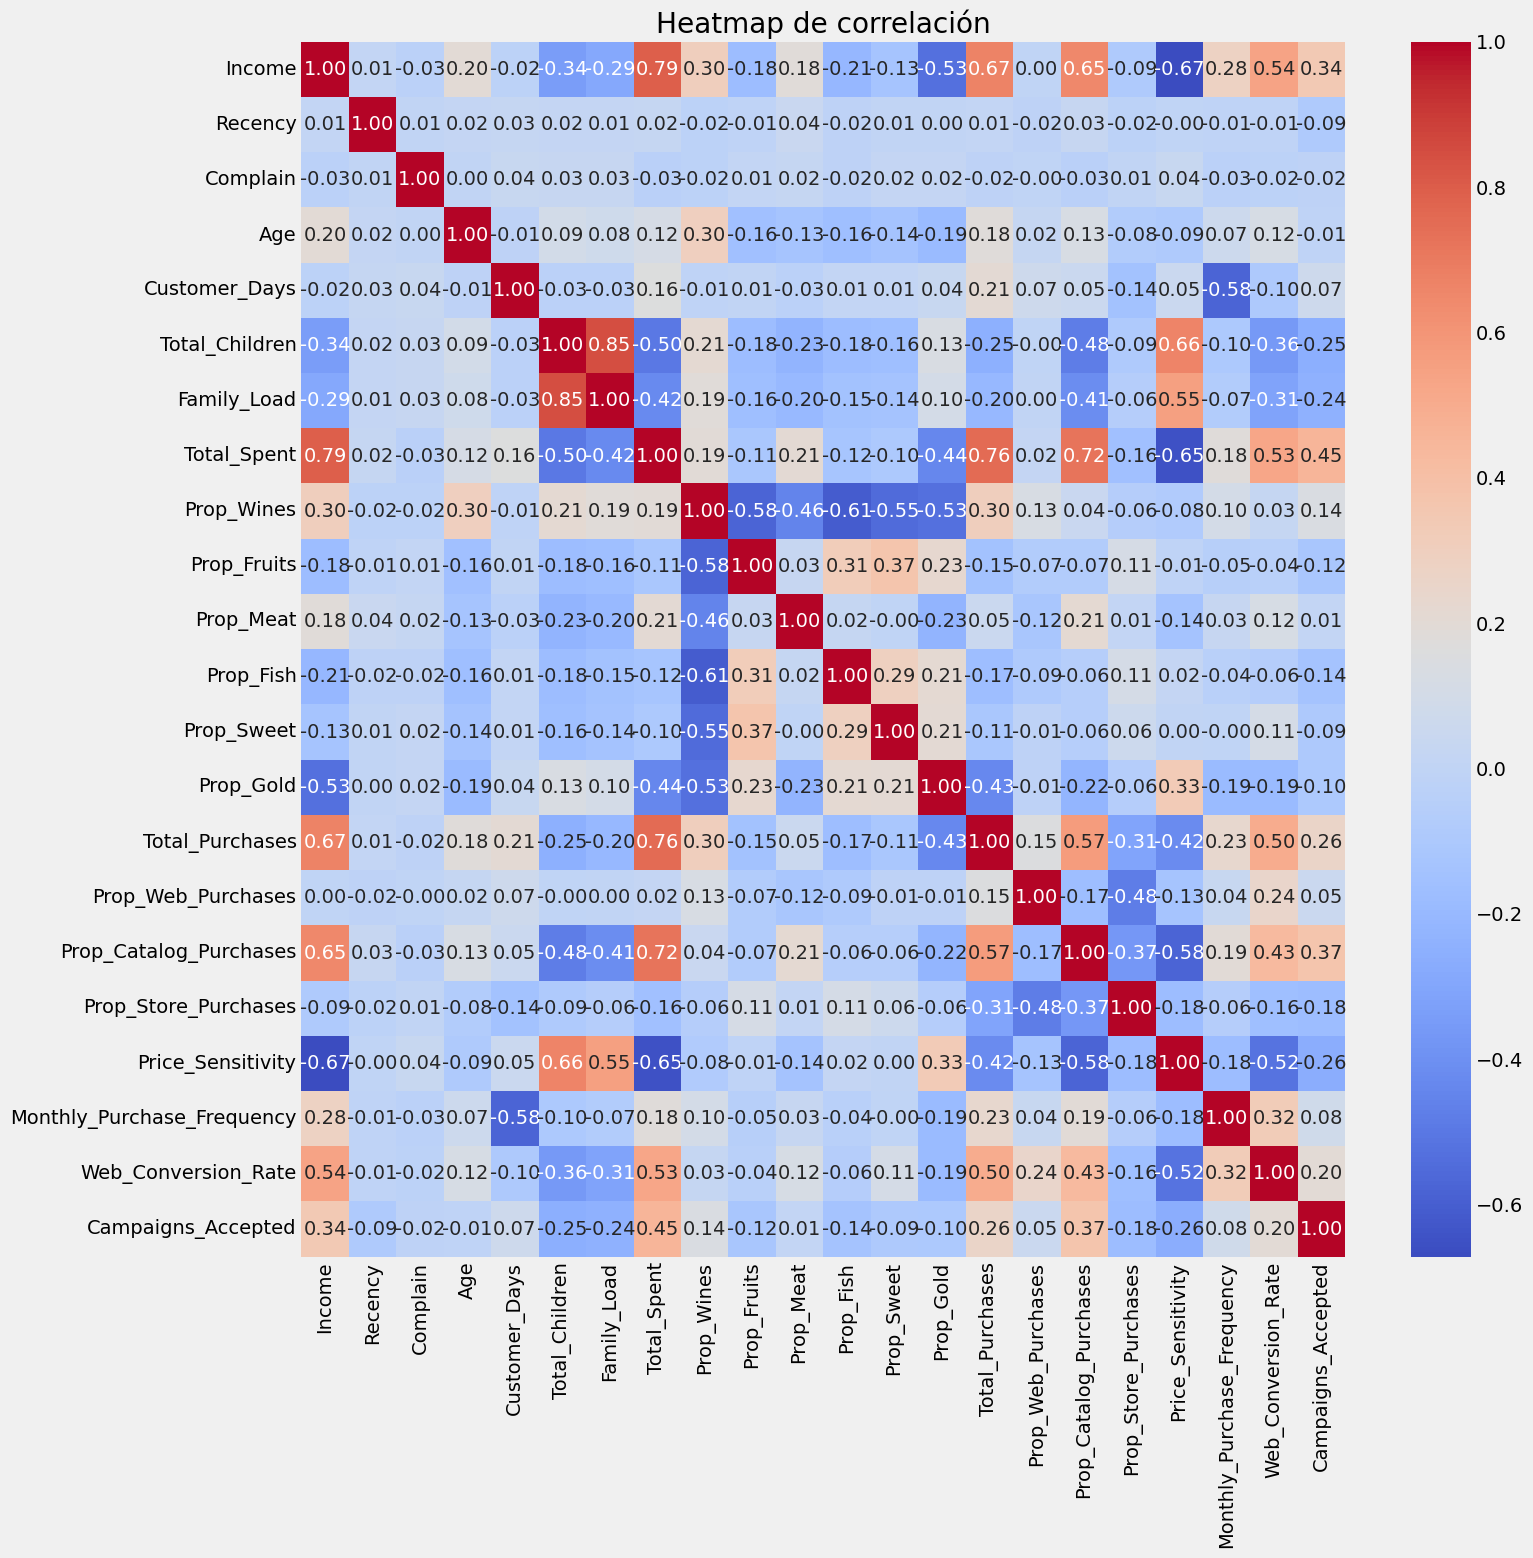

In [10]:
cor = df[num_cols].corr()
plt.figure(figsize = (15, 15))
sns.heatmap(cor, cmap = "coolwarm", fmt = ".2f", annot=True)
plt.title("Heatmap de correlación")
plt.show()

In [11]:
# Obtener las correlaciones en una lista ordenada (sin duplicados ni la diagonal)
cor_pairs = (
    cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))  # Solo parte superior
    .stack()
    .sort_values(ascending=False)
)

print(cor_pairs.head(10))
print(cor_pairs.tail(10))

Total_Children   Family_Load               0.849574
Income           Total_Spent               0.792740
Total_Spent      Total_Purchases           0.756876
                 Prop_Catalog_Purchases    0.721794
Income           Total_Purchases           0.670413
Total_Children   Price_Sensitivity         0.661244
Income           Prop_Catalog_Purchases    0.649302
Total_Purchases  Prop_Catalog_Purchases    0.569717
Family_Load      Price_Sensitivity         0.552478
Income           Web_Conversion_Rate       0.536564
dtype: float64
Price_Sensitivity       Web_Conversion_Rate          -0.519523
Prop_Wines              Prop_Gold                    -0.531800
Income                  Prop_Gold                    -0.532071
Prop_Wines              Prop_Sweet                   -0.553100
Customer_Days           Monthly_Purchase_Frequency   -0.575188
Prop_Wines              Prop_Fruits                  -0.576553
Prop_Catalog_Purchases  Price_Sensitivity            -0.579496
Prop_Wines              

**Conclusiones sobre las correlaciones:**

- **Correlaciones altas (positivas):**
  - ``Income`` y ``Total_Spent`` (0.792740): Una correlación positiva significativa entre los ingresos y el gasto total. Esto sugiere que a medida que aumentan los ingresos, los clientes tienden a gastar más, lo cual es esperado.
  - ``Total_Spent`` y ``Total_Purchases`` (0.756876): Hay una fuerte relación entre el total gastado y el número de compras realizadas, lo que es lógico, ya que a más compras, más gasto. Lo mismo con income y total_purchases.
  - ``Total_Children`` y ``Price_Sensitivity`` (0.661244): Hay una correlación moderada entre el número de hijos y la sensibilidad al precio, lo que podría sugerir que las familias con más hijos podrían ser más sensibles al precio debido a los gastos adicionales.
  - ``Income`` y ``Prop_Catalog_Purchases`` (0.649302): Los ingresos también muestran una correlación moderada con las compras a través del catálogo, lo que podría indicar que los clientes con mayores ingresos están más inclinados a realizar compras de este tipo.

- **Correlaciones bajas (negativas):**
  - ``Income y Price_Sensitivity`` (-0.671862): La relación negativa entre los ingresos y la sensibilidad al precio sugiere que los clientes con mayores ingresos tienden a ser menos sensibles al precio, lo cual es esperado, ya que no dependen tanto de las ofertas o descuentos. Lo mismo sucede entre ``Total_Spent`` y ``Price_Sensivity`` (-0.650456).
  - Las relaciones negativas entre proporciones de productos  indican que clientes que compran mucho de un tipo de producto compran poco de otro, igual que con canales de compra.


Vamos ahora  hacer análisis bivariado para descubrir patrones y relaciones entre algunas de las variables:

### Empezaremos comparando **Income** vs otras variables

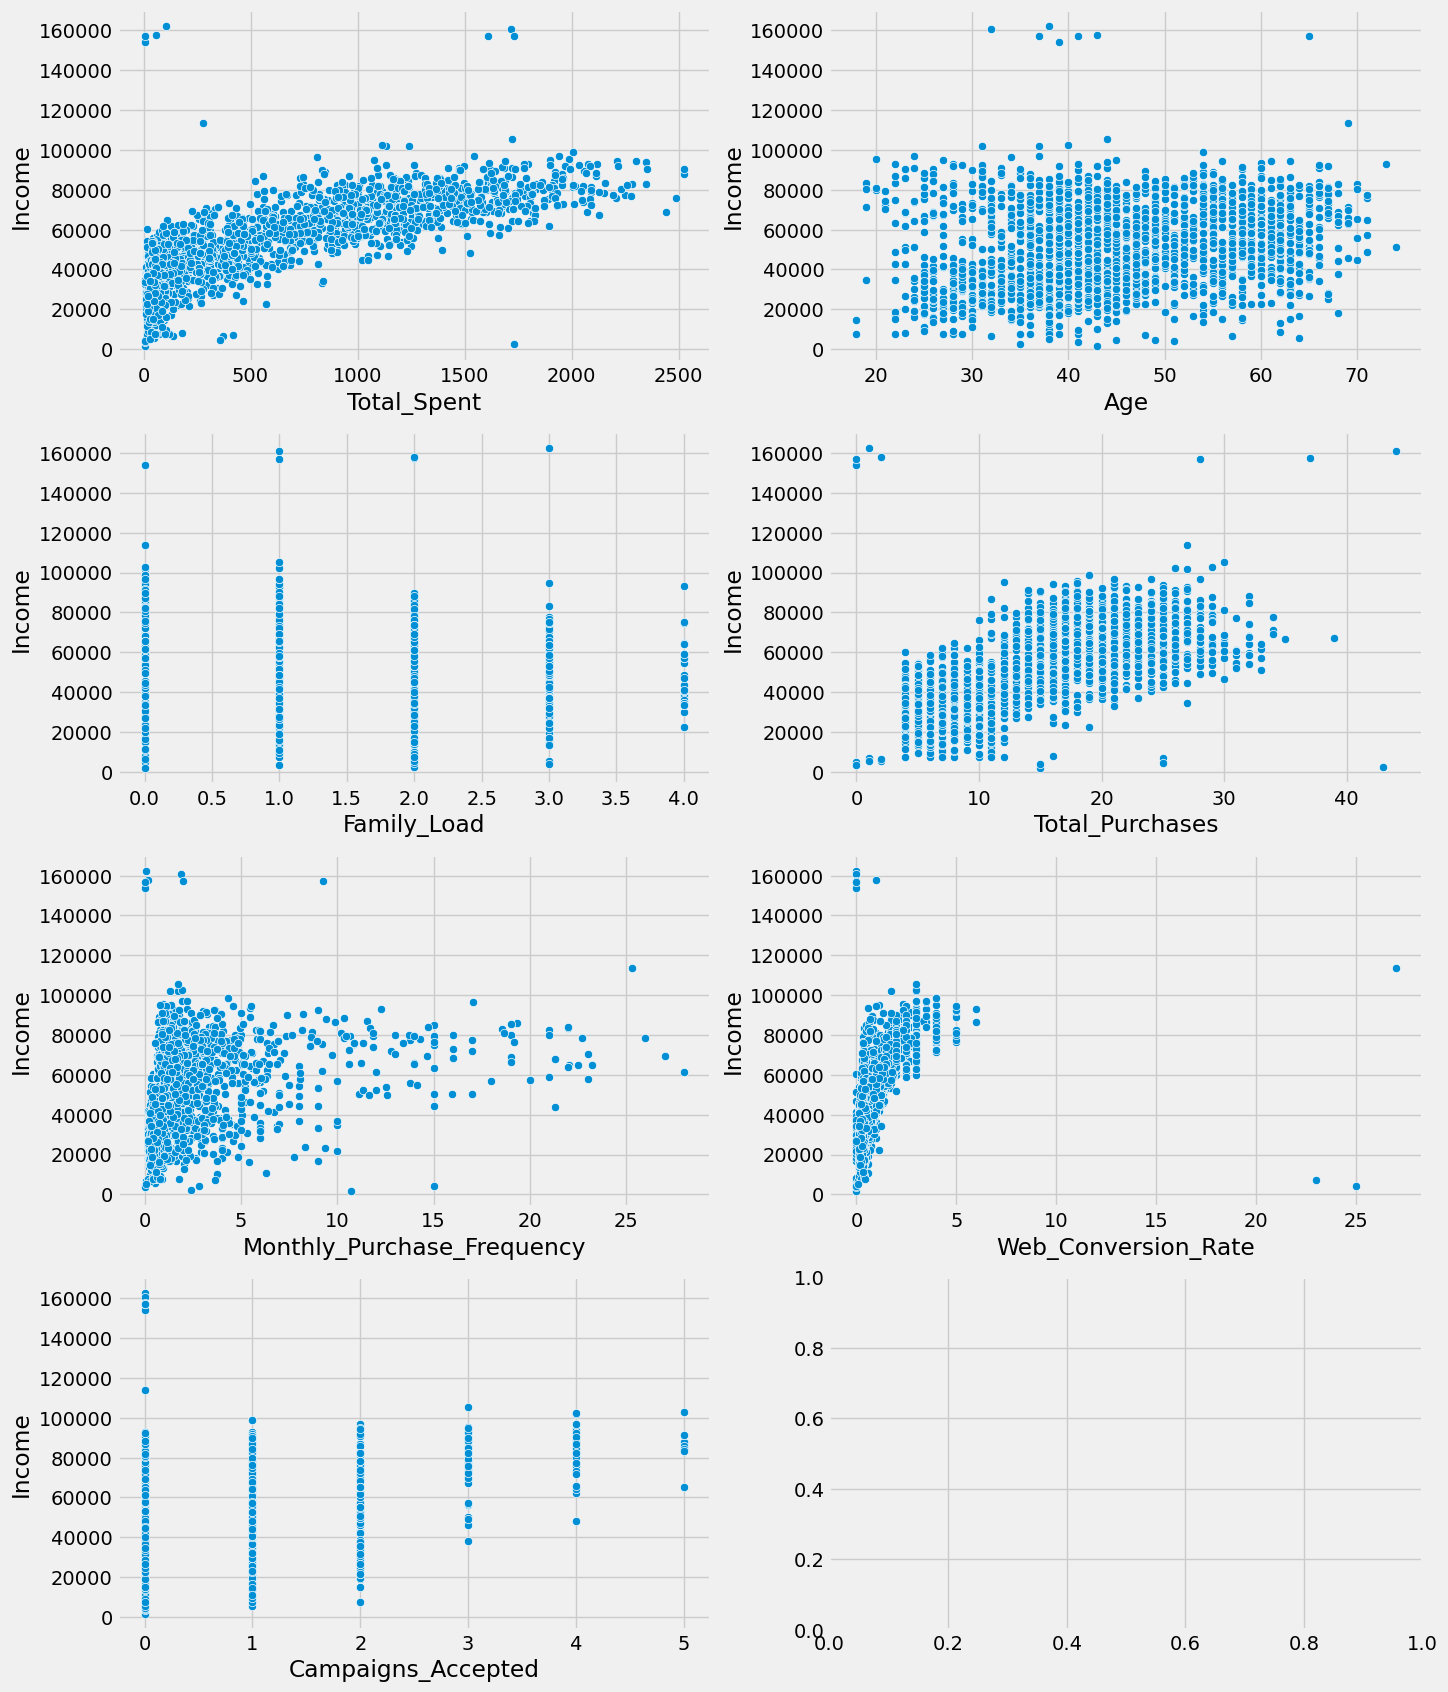

In [22]:
# Relación de income con algunas variables numéricas de interés
num_x_income = ["Total_Spent", "Age", "Family_Load", "Total_Purchases", "Monthly_Purchase_Frequency", "Web_Conversion_Rate", "Campaigns_Accepted"]

nrows = int(np.ceil(len(num_x_income) / 2))

fig, ax = plt.subplots(nrows, 2, figsize=(15, nrows * 5))
ax = ax.flatten()

for i, col in enumerate(num_x_income):
    sns.scatterplot(y = df["Income"], x=df[col], ax= ax[i])

plt.show()

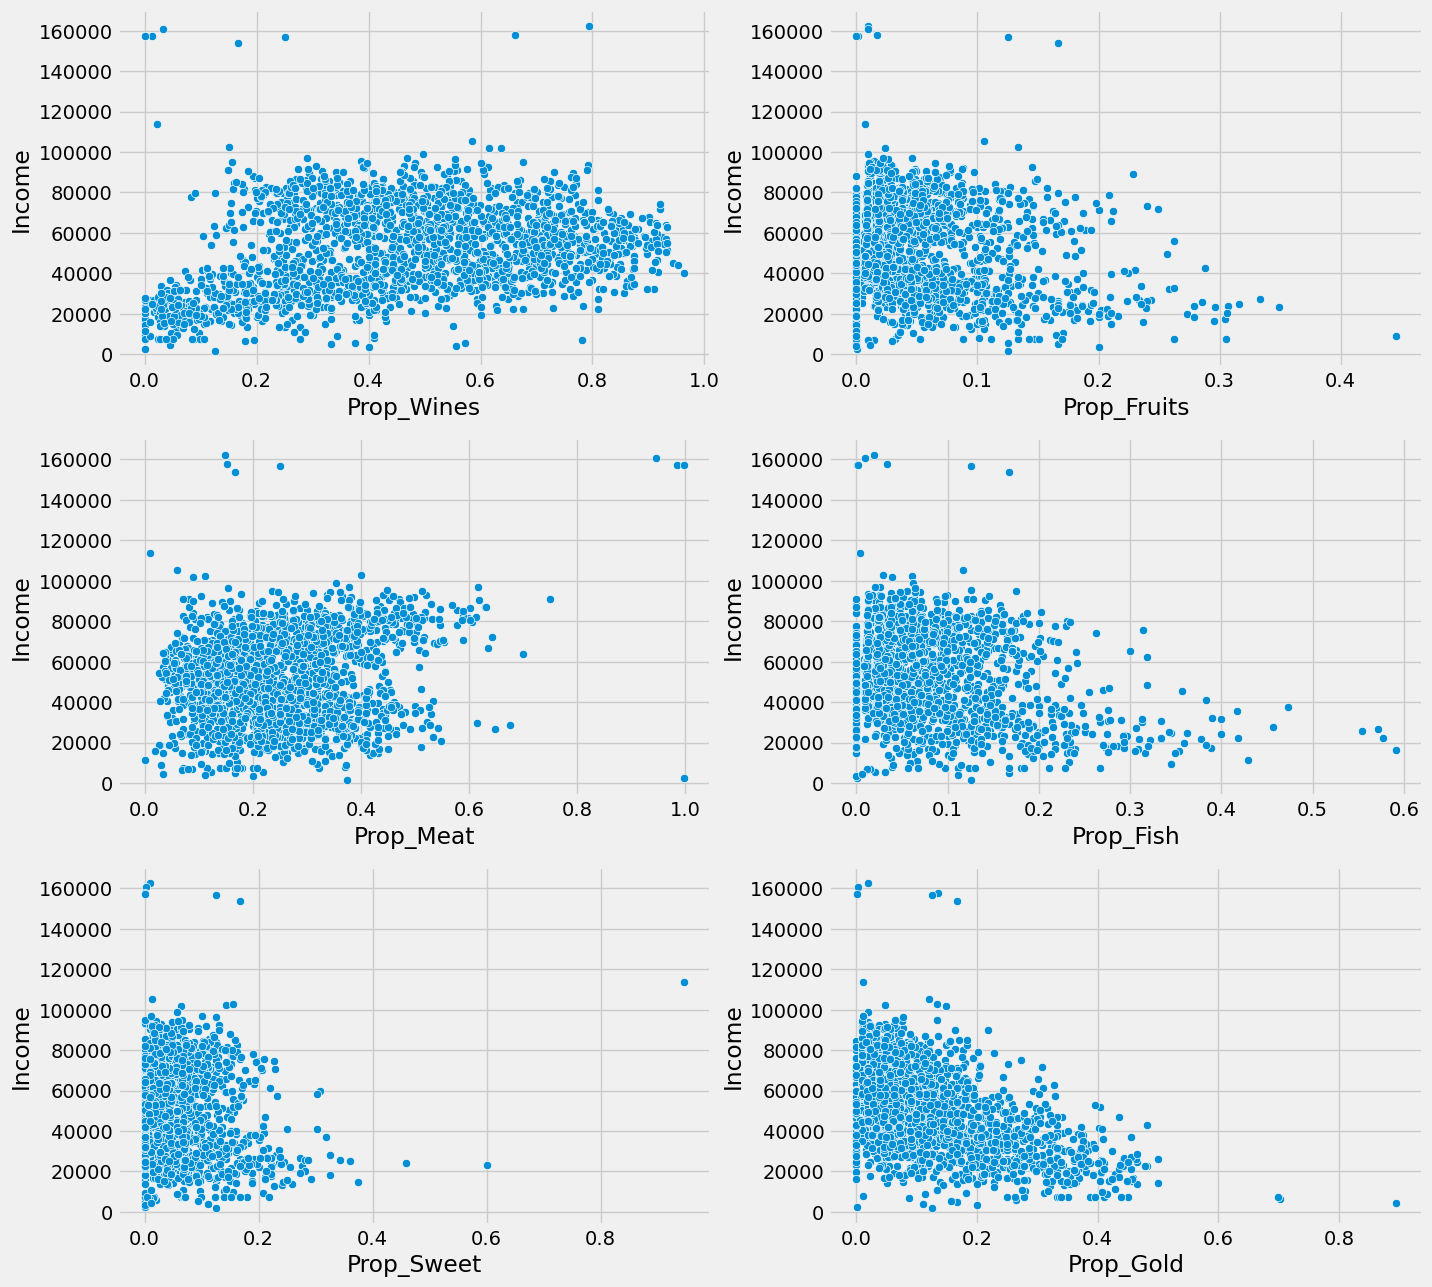

In [ ]:
# Relación de income con proporcion de productos
products_x_income = ["Prop_Wines", "Prop_Fruits", "Prop_Meat", "Prop_Fish", "Prop_Sweet", "Prop_Gold"]

nrows = int(np.ceil(len(products_x_income) / 2))

fig, ax = plt.subplots(nrows, 2, figsize=(15, nrows * 5))
ax = ax.flatten()

for i, col in enumerate(products_x_income):
    sns.scatterplot(y = df["Income"], x=df[col], ax= ax[i])

plt.show()

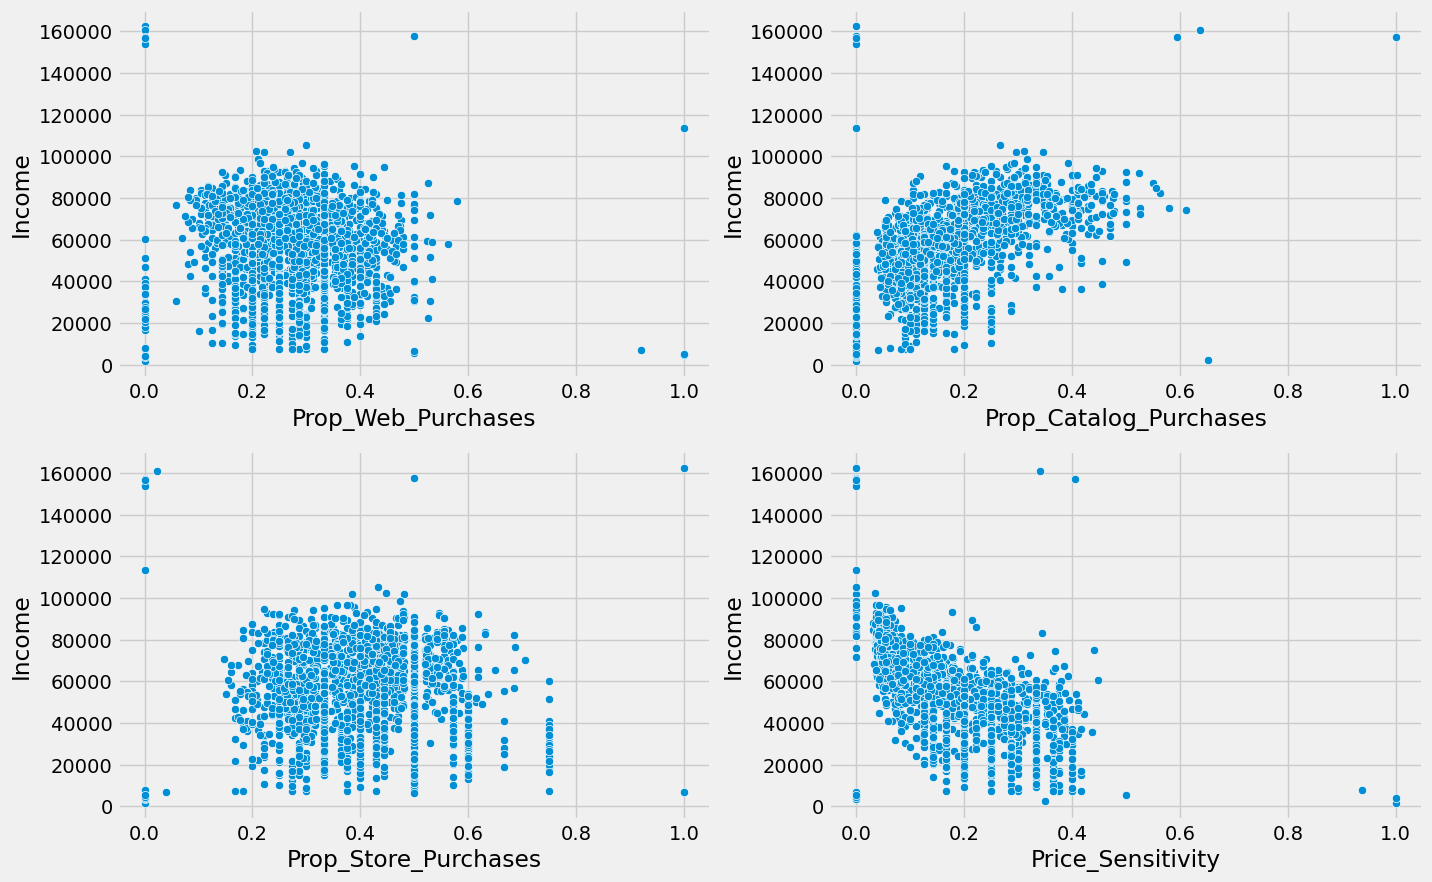

In [19]:
# Relación de income con proporcion de canales y deals
channels_x_income = ["Prop_Web_Purchases", "Prop_Catalog_Purchases", "Prop_Store_Purchases", "Price_Sensitivity"]

nrows = int(np.ceil(len(channels_x_income) / 2))

fig, ax = plt.subplots(nrows, 2, figsize=(15, nrows * 5))
ax = ax.flatten()

for i, col in enumerate(channels_x_income):
    sns.scatterplot(y = df["Income"], x=df[col], ax= ax[i])

plt.show()

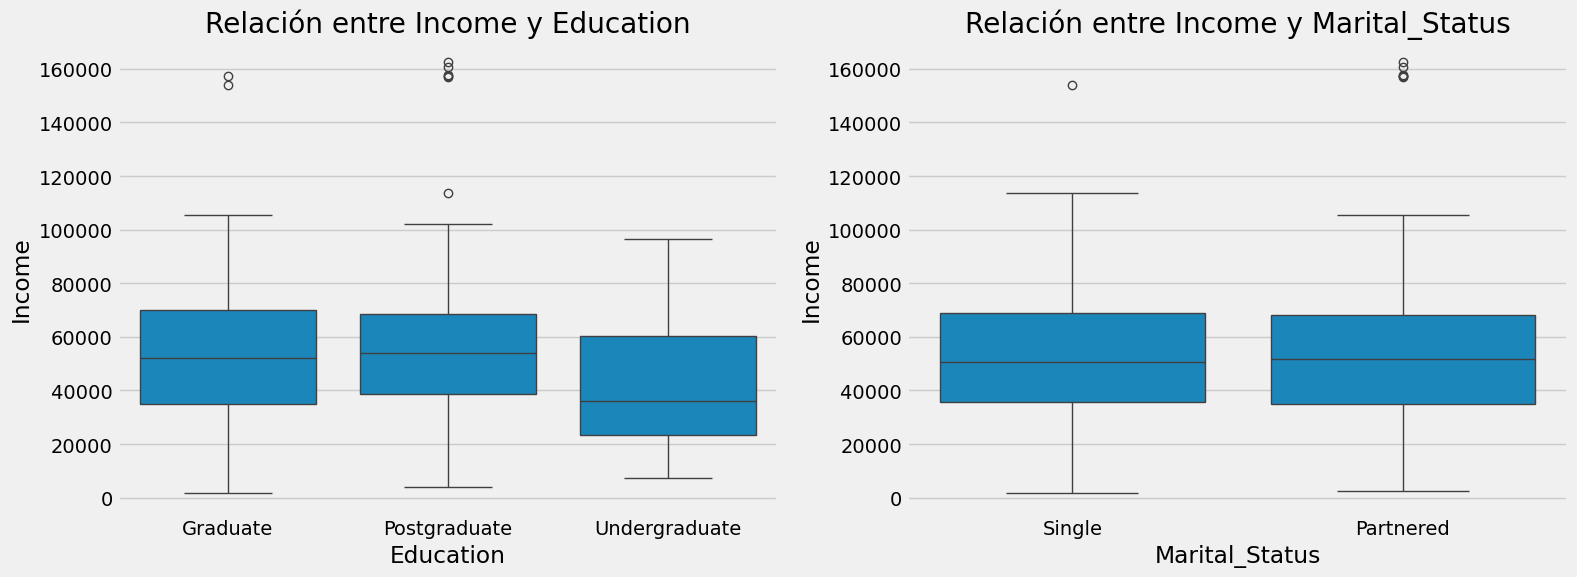

In [24]:
# Relación entre 'Income' y 'Education' y Marital_ Status

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot para Education
sns.boxplot(data=df, x='Education', y='Income', ax=axes[0])
axes[0].set_title('Relación entre Income y Education')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Income')

# Boxplot para Marital_Status
sns.boxplot(data=df, x='Marital_Status', y='Income', ax=axes[1])
axes[1].set_title('Relación entre Income y Marital_Status')
axes[1].set_xlabel('Marital_Status')
axes[1].set_ylabel('Income')

plt.tight_layout()
plt.show()

### **Observaciones Análisis Bivariado con Income**


### Variables numéricas

- **Total_Spent** y **Total_Purchases** muestran una clara relación positiva con el *income*: a mayor gasto o número de compras, mayor ingreso.
- **Monthly_Purchase_Frequency** y **Web_Conversion_Rate** también tienen relación positiva: los ingresos bajos son poco frecuentes en los valores altos de estas variables.
- **Family_Load** indica que los valores más altos (como 4) tienden a concentrar ingresos medios o altos.
- **AcceptedCmpTotal** (campañas) parece relacionarse positivamente: a mayor número de campañas aceptadas, menoss frecuentes son los ingresos bajos.
- **Age** no muestra una relación clara con el *income*.

### Proporciones de productos

- **Prop_Wines** muestra una relación positiva: quienes compran más vino tienden a tener mayores ingresos.
- **Prop_Meat** también sugiere una ligera relación positiva.
- **Prop_Fish**, **Prop_Sweet** y **Prop_Gold** presentan una débil relación negativa con el *income*.
- **Prop_Fruits** no parece guardar relación significativa.

### Proporciones de canales de compra

- **Prop_Catalog_Purchases** tiene una relación positiva: los clientes con más ingresos compran más por catálogo.
- **Prop_Deals_Purchases** muestra una relación negativa: los clientes con menores ingresos aprovechan más los descuentos.
- **Prop_Store_Purchases** y **Prop_Web_Purchases** no presentan una relación clara con el ingreso.

### Variables categóricas
- En cuanto a la **educación**, los usuarios con nivel **Undergraduate** tienden a tener menores ingresos en comparación con los **Graduados** o **Postgraduados**.
- En cuanto a **Marital_Statu**, no parece haber relación

### Analicemos ahora según **Total_Spent**:

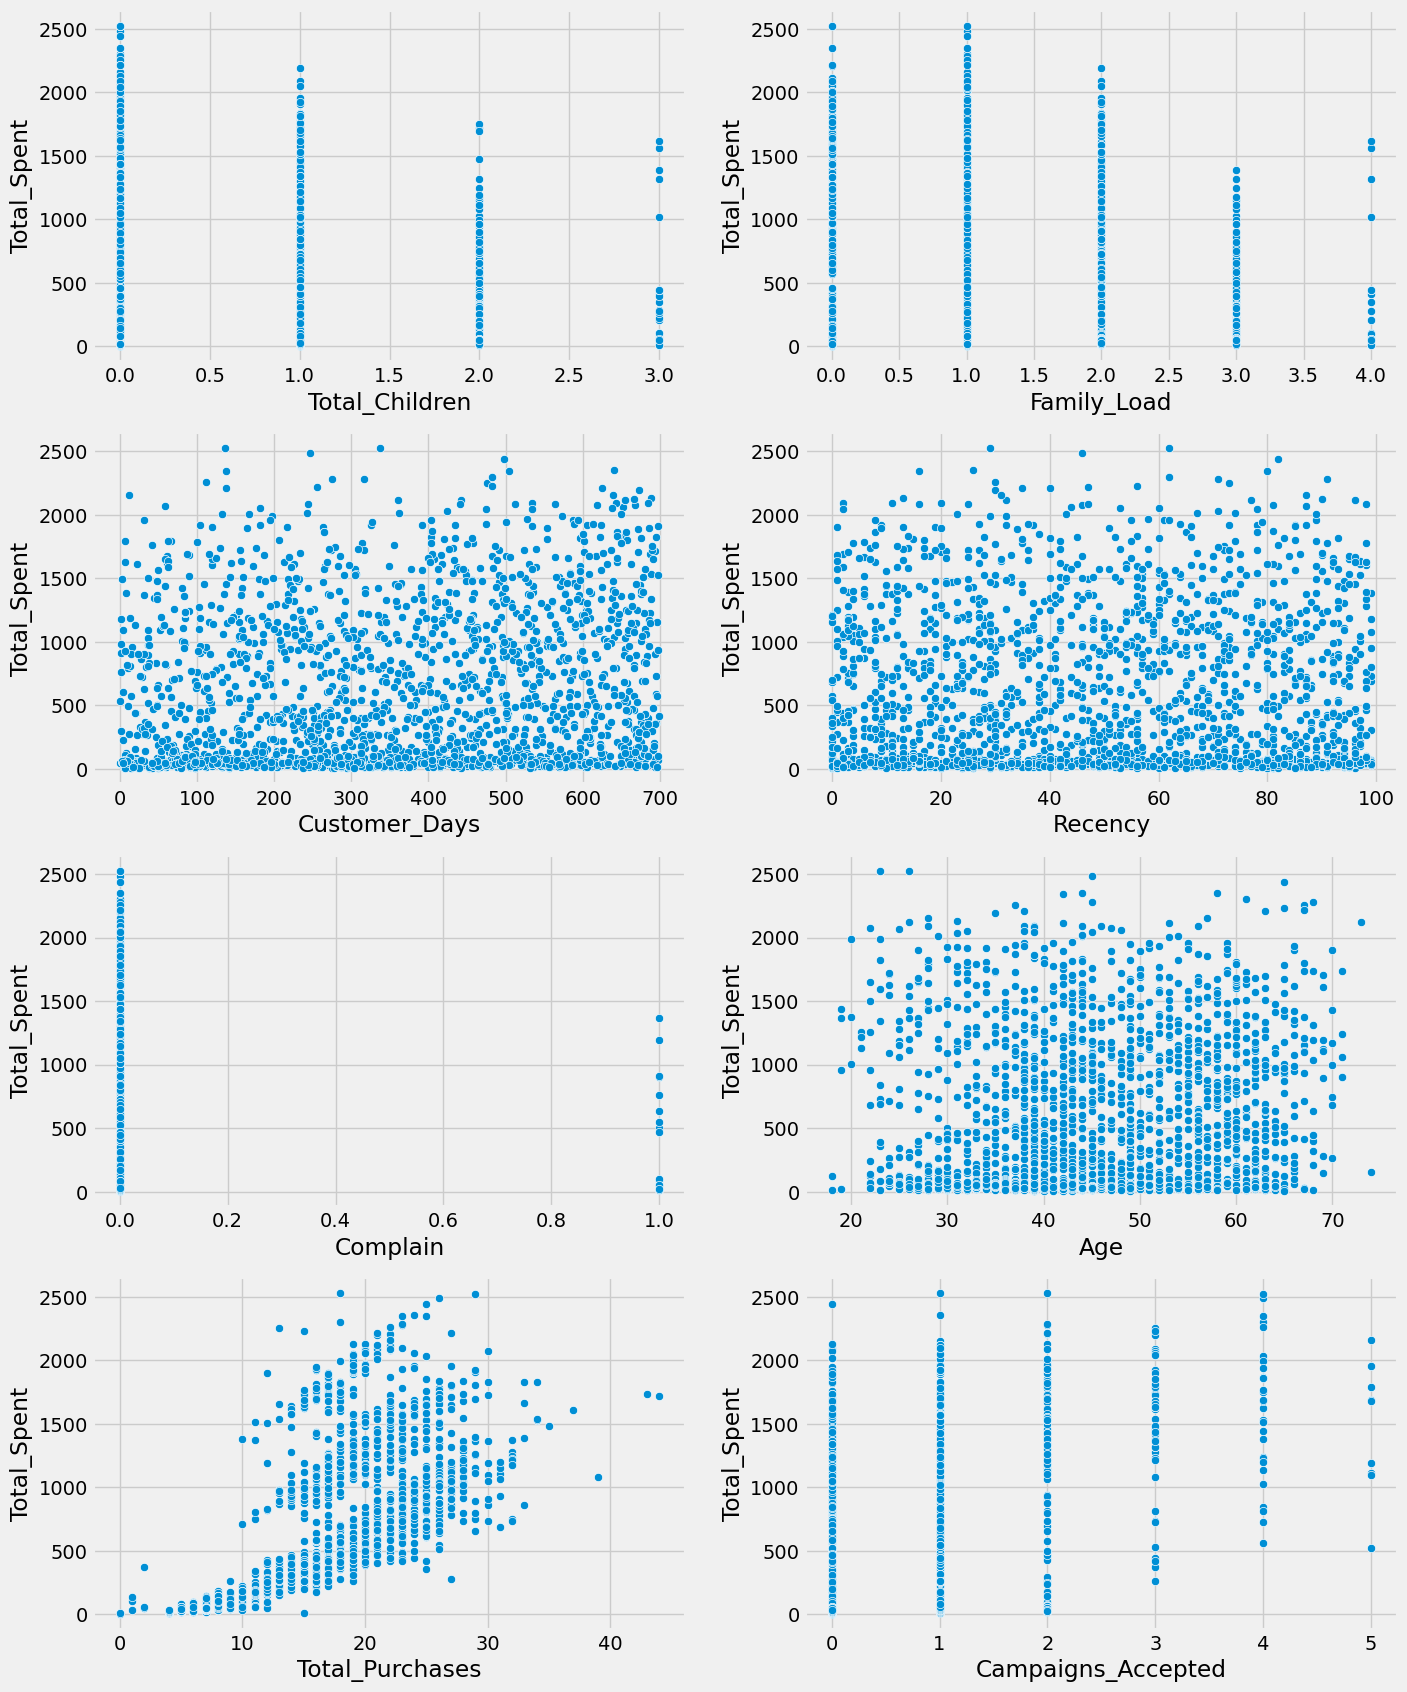

In [25]:
# Relación de total_spent con algunas variables numéricas de interés
num_x_spent = ["Total_Children", "Family_Load", "Customer_Days", "Recency", "Complain", "Age", "Total_Purchases", "Campaigns_Accepted"]

nrows = int(np.ceil(len(num_x_spent) / 2))

fig, ax = plt.subplots(nrows, 2, figsize=(15, nrows * 5))
ax = ax.flatten()

for i, col in enumerate(num_x_spent):
    sns.scatterplot(y = df["Total_Spent"], x=df[col], ax= ax[i])

plt.show()

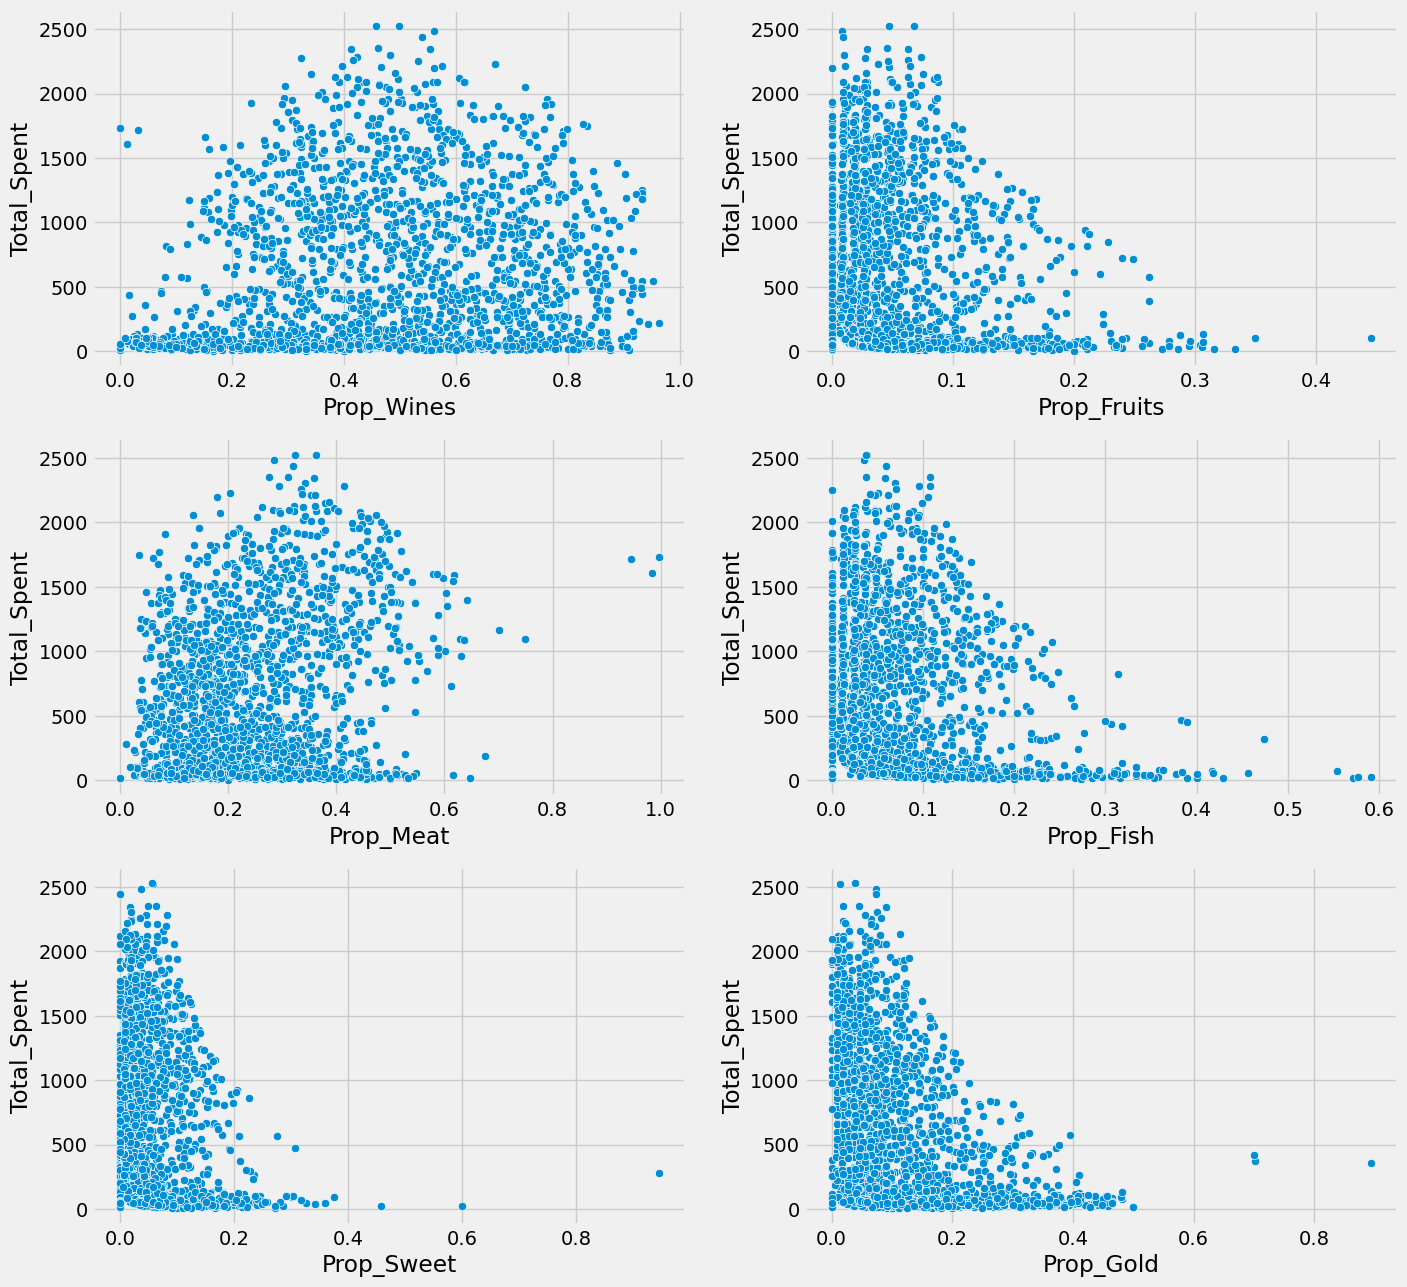

In [26]:
# Relación de Total_Spent con proporcion de productos
products_x_spent = ["Prop_Wines", "Prop_Fruits", "Prop_Meat", "Prop_Fish", "Prop_Sweet", "Prop_Gold"]

nrows = int(np.ceil(len(products_x_spent) / 2))

fig, ax = plt.subplots(nrows, 2, figsize=(15, nrows * 5))
ax = ax.flatten()

for i, col in enumerate(products_x_spent):
    sns.scatterplot(y = df["Total_Spent"], x=df[col], ax= ax[i])

plt.show()

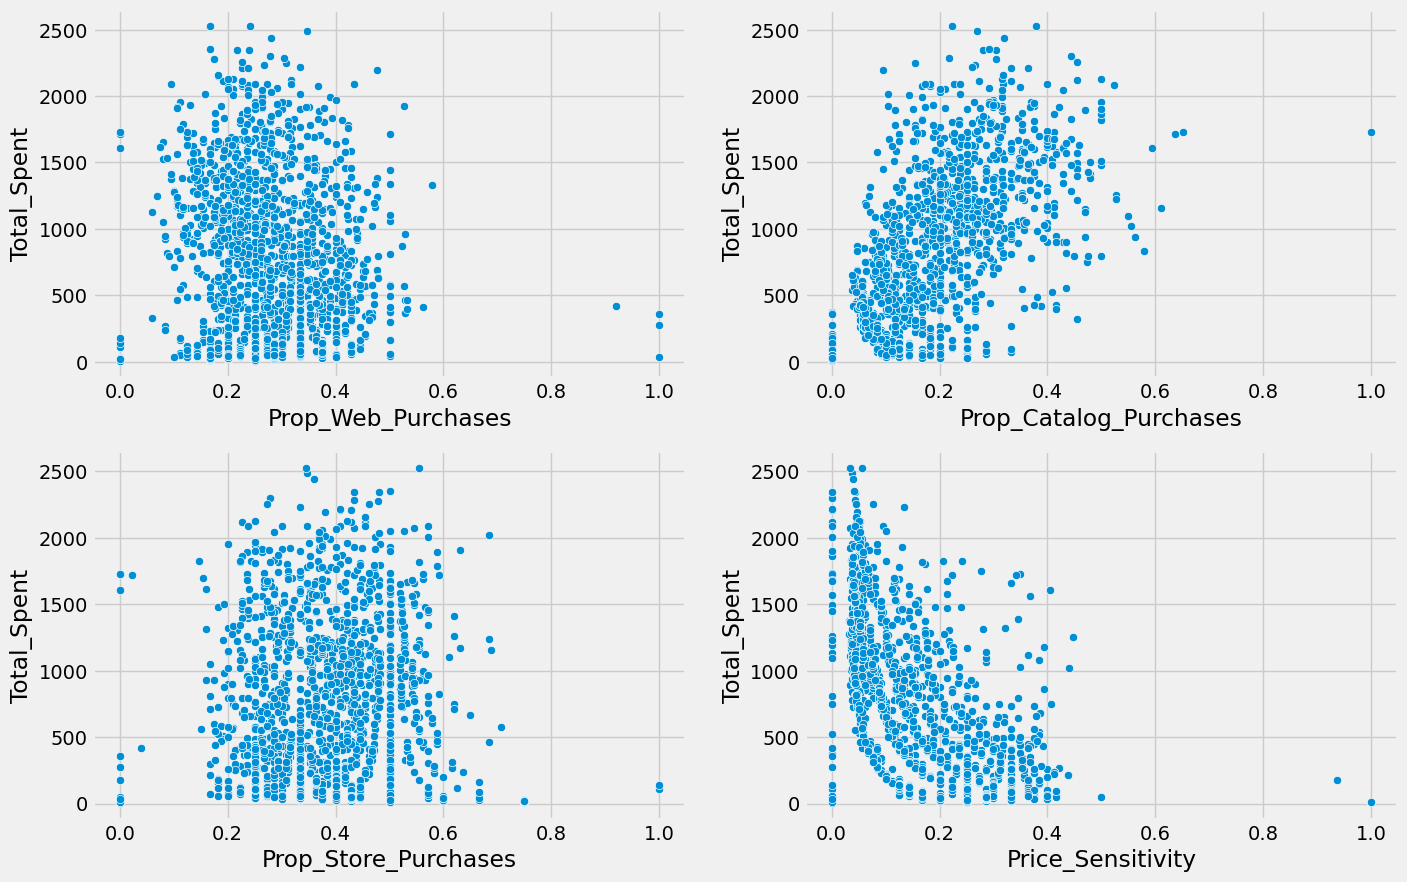

In [27]:
# Relación de Total_Spent con proporcion de canales y deals
channels_x_spent = ["Prop_Web_Purchases", "Prop_Catalog_Purchases", "Prop_Store_Purchases", "Price_Sensitivity"]

nrows = int(np.ceil(len(channels_x_spent) / 2))

fig, ax = plt.subplots(nrows, 2, figsize=(15, nrows * 5))
ax = ax.flatten()

for i, col in enumerate(channels_x_spent):
    sns.scatterplot(y = df["Total_Spent"], x=df[col], ax= ax[i])

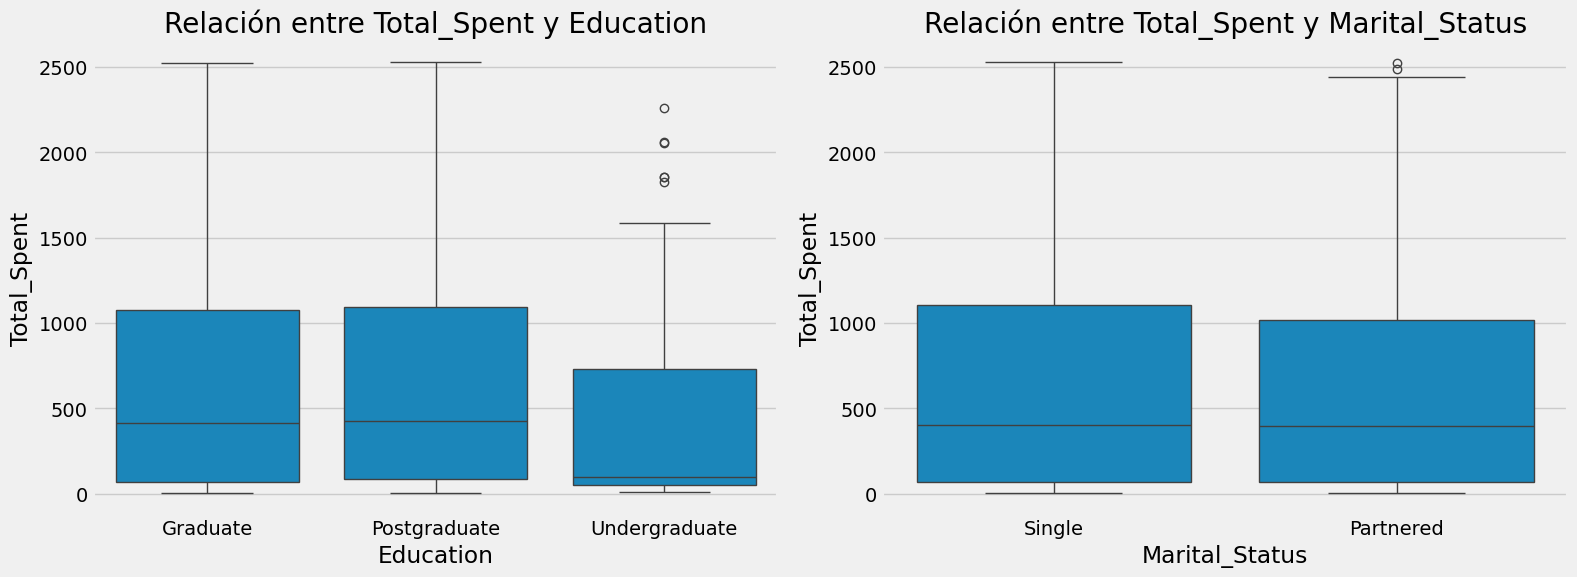

In [28]:
# Relación entre 'Total_spent' y 'Education' y Marital_ Status

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot para Education
sns.boxplot(data=df, x='Education', y='Total_Spent', ax=axes[0])
axes[0].set_title('Relación entre Total_Spent y Education')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Total_Spent')

# Boxplot para Marital_Status
sns.boxplot(data=df, x='Marital_Status', y='Total_Spent', ax=axes[1])
axes[1].set_title('Relación entre Total_Spent y Marital_Status')
axes[1].set_xlabel('Marital_Status')
axes[1].set_ylabel('Total_Spent')

plt.tight_layout()
plt.show()


### **Observaciones Análisis Bivariado con Total_Spent**

### Variables numéricas

- **Total_Spent** y **Total_Purchases** muestran una clara relación positiva: a mayor número de compras, mayor gasto total.
- **Customer_Days** y **Recency** no presentan una relación clara con el gasto total.
- Los clientes que han **presentado quejas** tienden a gastar menos.
- **Age** no muestra una relación significativa con el gasto total.
- **Campaigns_Accepted** tiene una relación positiva: cuantas más campañas aceptadas, mayor es el gasto total.

### Proporciones de productos

- **Prop_Wines** y **Prop_Meat** muestran una relación positiva: a mayor proporción de vino y carne comprados, mayor es el gasto total.
- **Prop_Fruits**, **Prop_Fish**, **Prop_Sweet** y **Prop_Gold** tienen una relación negativa: a mayor proporción de estos productos, menor es el gasto total.

### Proporciones de canales de compra

- **Prop_Catalog_Purchases** tiene una relación positiva: los clientes con mayor gasto total tienden a comprar más por catálogo.
- **Prop_Deals_Purchases** muestra una relación negativa: los clientes con menor gasto total aprovechan más los descuentos.
- **Prop_Store_Purchases** y **Prop_Web_Purchases** no presentan una relación clara con el gasto total.

### Variables categóricas

- En cuanto a la **educación**, los **Graduados** y **Postgraduados** tienden a gastar más, probablemente debido a mayores ingresos en comparación con los **Undergraduate**.
- En cuanto a **Marital_Status**, los **solteros** tienden a gastar más que los **casados**.

-----------------------

## Conclusión de la Exploración de Datos

Hasta este momento, hemos explorado y visualizado diversas relaciones entre las variables para comprender mejor el comportamiento de los clientes y cómo se distribuyen en los diferentes canales de compra. A partir de los resultados obtenidos, hemos identificado patrones y comportamientos clave que podrían influir en los modelos de análisis posteriores.

## Pasamos al Preprocesamiento de Datos

Con la fase de exploración de datos completada, es hora de preparar los datos para la siguiente etapa de nuestro análisis. En esta fase de preprocesamiento, nos enfocaremos en transformar los datos para dejarlos listos para la creación de un modelo de clustering. 